In [1]:
import io, glob, os
import numpy as np
from PIL import Image, ImageOps
from PIL import ImageDraw
from PIL import ImageFont

In [2]:
file_path = './handwritings/160-handwritings.txt'

In [3]:
with io.open(file_path, 'r', encoding='utf-8') as f:
    handwriting_charset = f.read().splitlines()
handwriting_charset.sort()
len(handwriting_charset)

160

In [4]:
label_file = './get_data/2350-hangul.txt'
with io.open(label_file, 'r', encoding='utf-8') as f:
    charset = f.read().splitlines()
len(charset)

2350

In [5]:
set([i in charset for i in handwriting_charset])

{True}

## page to letters

In [6]:
def get_page(data_num, file_path):
    dataset = []
    for i in range(1, data_num+1):
        data = Image.open(file_path + "50-{}.jpg".format(i))
        dataset.append(data)
    return dataset

In [7]:
def page_to_LetterSet(page):
    page = page.crop(box=(4, 575, 1663, 2000))
    letter_set = page.crop((0, 0, 1659, 1300))
    return letter_set

In [8]:
page_path = "./handwritings/50_handwritings_page/"
pages = get_page(5, page_path)
len(pages)

5

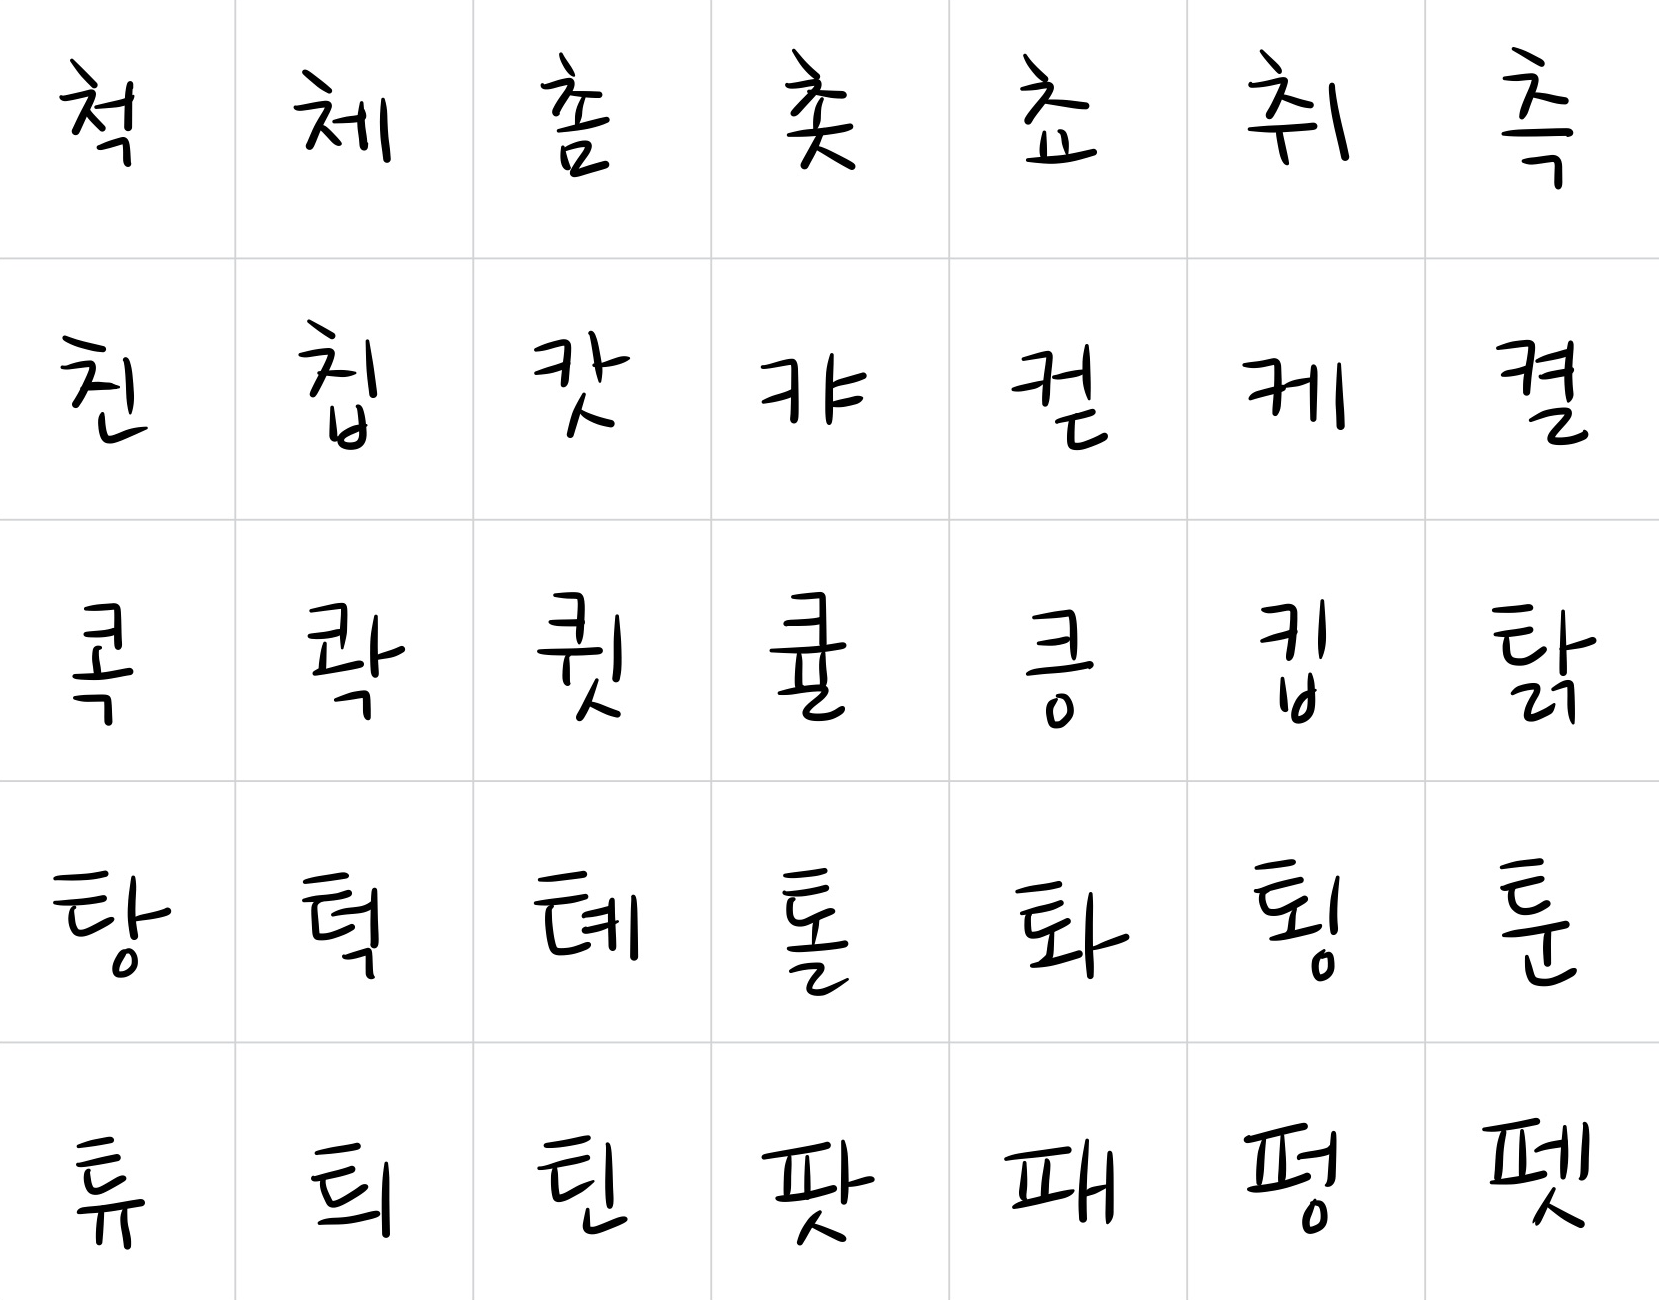

In [9]:
letter_set = page_to_LetterSet(pages[3])
letter_set

In [10]:
def letterset_to_letter(LetterSet, i, j, size=(64, 64)):
    letter = LetterSet.crop((j * 237 + 20, i * 260 + 20, (j+1) * 237 - 20, (i+1) * 260 - 20))
    letter = letter.resize(size)
    return letter

In [11]:
def LetterSet_to_list(letter_set):
    chars = []
    for i in range(5):
        for j in range(7):
            letter = letterset_to_letter(letter_set, i, j)
            letter = np.asarray(letter)
            letter = letter[:, :, 0]
            chars.append(letter)
    return np.array(chars)

In [12]:
chars = LetterSet_to_list(letter_set)
chars.shape

(35, 64, 64)

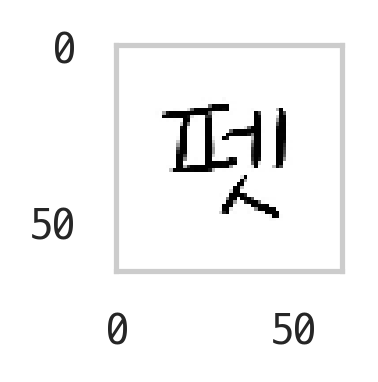

In [13]:
plt.figure(figsize=(1, 1))
plt.imshow(chars[-1], cmap='gray')
# plt.axis('off')
plt.grid()
plt.show()

### 96자 dataset

In [14]:
handwriting_index = np.array([(idx, i) for idx, i in enumerate(handwriting_charset)])
handwriting_index

array([['0', '갈'],
       ['1', '걘'],
       ['2', '겹'],
       ['3', '곤'],
       ['4', '곶'],
       ['5', '굉'],
       ['6', '궁'],
       ['7', '궐'],
       ['8', '귀'],
       ['9', '급'],
       ['10', '깊'],
       ['11', '깼'],
       ['12', '끙'],
       ['13', '난'],
       ['14', '낳'],
       ['15', '낵'],
       ['16', '넋'],
       ['17', '널'],
       ['18', '놉'],
       ['19', '뇬'],
       ['20', '눙'],
       ['21', '뉘'],
       ['22', '늑'],
       ['23', '닮'],
       ['24', '닺'],
       ['25', '댔'],
       ['26', '뎅'],
       ['27', '뎌'],
       ['28', '됨'],
       ['29', '둘'],
       ['30', '뒤'],
       ['31', '득'],
       ['32', '딛'],
       ['33', '땍'],
       ['34', '떻'],
       ['35', '뚫'],
       ['36', '랗'],
       ['37', '랭'],
       ['38', '렬'],
       ['39', '롼'],
       ['40', '료'],
       ['41', '룹'],
       ['42', '룽'],
       ['43', '류'],
       ['44', '륵'],
       ['45', '리'],
       ['46', '만'],
       ['47', '맵'],
       ['48', '메'],
       ['49', '목'],
       ['5

In [15]:
charset_96 = handwriting_index[sorted(np.random.choice(range(160), 96, replace=False))]
charset_96

array([['1', '걘'],
       ['3', '곤'],
       ['4', '곶'],
       ['5', '굉'],
       ['6', '궁'],
       ['7', '궐'],
       ['11', '깼'],
       ['12', '끙'],
       ['14', '낳'],
       ['15', '낵'],
       ['16', '넋'],
       ['19', '뇬'],
       ['20', '눙'],
       ['21', '뉘'],
       ['23', '닮'],
       ['25', '댔'],
       ['26', '뎅'],
       ['27', '뎌'],
       ['30', '뒤'],
       ['31', '득'],
       ['32', '딛'],
       ['33', '땍'],
       ['34', '떻'],
       ['36', '랗'],
       ['38', '렬'],
       ['40', '료'],
       ['42', '룽'],
       ['44', '륵'],
       ['46', '만'],
       ['47', '맵'],
       ['49', '목'],
       ['50', '뫄'],
       ['51', '묫'],
       ['52', '뭉'],
       ['54', '믐'],
       ['55', '민'],
       ['56', '밗'],
       ['58', '벅'],
       ['60', '별'],
       ['62', '뵉'],
       ['64', '브'],
       ['65', '빛'],
       ['66', '빪'],
       ['70', '셰'],
       ['71', '손'],
       ['72', '솨'],
       ['75', '싶'],
       ['76', '쏙'],
       ['80', '약'],
       ['84', '왠'],
      

In [16]:
char_imgs = []
for page in pages:
    letter_set = page_to_LetterSet(page)
    page_chars = LetterSet_to_list(letter_set)
    char_imgs.extend(page_chars)
    
char_imgs = np.array(char_imgs)
char_imgs = char_imgs[:160]
char_imgs.shape

(160, 64, 64)

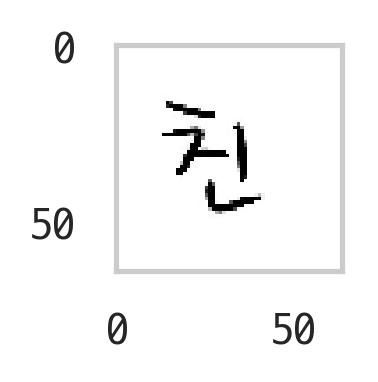

In [17]:
plt.figure(figsize=(1, 1))
plt.imshow(char_imgs[112], cmap='gray')
# plt.axis('off')
plt.grid()
plt.show()

In [18]:
save_path = './handwritings/50_sample-160'
for idx, char in enumerate(char_imgs):
    
        char_image = Image.fromarray(char)
        char_image.save(os.path.join(save_path, '50_%04d.png' % idx))

In [19]:
def draw_handwriting(ch, src_font, canvas_size, dst_folder):
    s = ch.decode('utf-8').encode('raw_unicode_escape').replace("\\u","").upper()
    dst_path = dst_folder + "/uni" + s + ".png"
    dst_img = Image.open(dst_path)
    # check the filter example in the hashes or not
    src_img = draw_single_char(ch, src_font, canvas_size)
    example_img = Image.new("RGB", (canvas_size * 2, canvas_size), (255, 255, 255)).convert('L')
    example_img.paste(dst_img, (0, 0))
    example_img.paste(src_img, (canvas_size, 0))
    return example_img


def draw_single_char(ch, font, canvas_size):
    image = Image.new('L', (canvas_size, canvas_size), color=255)
    drawing = ImageDraw.Draw(image)
    w, h = drawing.textsize(ch, font=font)
    drawing.text(
        ((canvas_size-w)/2, (canvas_size-h)/2),
        ch,
        fill=(0),
        font=font
    )
    return image


def draw_example(ch, src_font, dst_font, canvas_size):
    dst_img = draw_single_char(ch, dst_font, canvas_size)
    src_img = draw_single_char(ch, src_font, canvas_size)
    example_img = Image.new("RGB", (canvas_size * 2, canvas_size), (255, 255, 255)).convert('L')
    example_img.paste(dst_img, (0, 0))
    example_img.paste(src_img, (canvas_size, 0))
    return example_img